In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [51]:
DATA_PATH = '/kaggle/input/gene-info-tabe/gene_info_ori_total.csv'

In [52]:
df_base = pd.read_csv(DATA_PATH, sep=',')
df_base.head()

,Unnamed: 0,rowname,n.ball.volume,Max_euclidean_dist,ocr_length,Number_of_clusters,median_within_median,median_between_median,max_between_max,max_within_max,max_within_OCR_number,zero_number,within_median_zero,within_max_zero,max_kde_density,kde_cluster_density_max
0,1,Sox17,-0.481813,1.050376,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021158,NaN
1,2,Fam228b,-0.068868,-1.018825,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Il11,0.311679,0.098104,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005216,NaN
3,4,Shcbp1,-0.889517,-1.562692,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035798,NaN
4,5,Mrpl15,-1.777956,-1.562811,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008608,NaN


In [53]:
df_base.drop(columns=["Unnamed: 0"], inplace=True)
df_base.head()

,rowname,n.ball.volume,Max_euclidean_dist,ocr_length,Number_of_clusters,median_within_median,median_between_median,max_between_max,max_within_max,max_within_OCR_number,zero_number,within_median_zero,within_max_zero,max_kde_density,kde_cluster_density_max
0,Sox17,-0.481813,1.050376,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021158,NaN
1,Fam228b,-0.068868,-1.018825,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Il11,0.311679,0.098104,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005216,NaN
3,Shcbp1,-0.889517,-1.562692,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035798,NaN
4,Mrpl15,-1.777956,-1.562811,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008608,NaN


In [54]:
df_base.index = df_base.iloc[:,0]
df_base.head()

,rowname,n.ball.volume,Max_euclidean_dist,ocr_length,Number_of_clusters,median_within_median,median_between_median,max_between_max,max_within_max,max_within_OCR_number,zero_number,within_median_zero,within_max_zero,max_kde_density,kde_cluster_density_max
rowname,,,,,,,,,,,,,,,
Sox17,Sox17,-0.481813,1.050376,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021158,NaN
Fam228b,Fam228b,-0.068868,-1.018825,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Il11,Il11,0.311679,0.098104,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005216,NaN
Shcbp1,Shcbp1,-0.889517,-1.562692,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035798,NaN
Mrpl15,Mrpl15,-1.777956,-1.562811,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008608,NaN


In [55]:
df_base.drop(columns=["rowname"], inplace=True)
df_base.head()

,n.ball.volume,Max_euclidean_dist,ocr_length,Number_of_clusters,median_within_median,median_between_median,max_between_max,max_within_max,max_within_OCR_number,zero_number,within_median_zero,within_max_zero,max_kde_density,kde_cluster_density_max
rowname,,,,,,,,,,,,,,
Sox17,-0.481813,1.050376,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021158,NaN
Fam228b,-0.068868,-1.018825,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Il11,0.311679,0.098104,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005216,NaN
Shcbp1,-0.889517,-1.562692,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035798,NaN
Mrpl15,-1.777956,-1.562811,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008608,NaN


In [56]:
def standardize_data(df):
    # read in from csv
    df = df
    # replace nan with -99
    df = df.fillna(-99)
    df = df.values.reshape(-1, df.shape[1]).astype('float32')
    # randomly split
    X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)
    # standardize values
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)   
    
    return X_train, X_test, scaler

In [57]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, path, train=True):
        self.X_train, self.X_test, self.standardizer = standardize_data(df_base)
        if train:
            self.x = torch.from_numpy(self.X_train)
            self.len=self.x.shape[0]
        else:
            self.x = torch.from_numpy(self.X_test)
            self.len=self.x.shape[0]
        del self.X_train
        del self.X_test 
    def __getitem__(self,index):      
        return self.x[index]
    def __len__(self):
        return self.len

In [58]:
traindata_set=DataBuilder(DATA_PATH, train=True)
testdata_set=DataBuilder(DATA_PATH, train=False)

In [59]:
def get_entire_data(df):
    # read in from csv
    df = df
    # replace nan with -99
    df = df.fillna(-99)
    df = df.values.reshape(-1, df.shape[1]).astype('float32')  
    return df

In [60]:
trainloader=DataLoader(dataset=traindata_set,batch_size=1024)
testloader=DataLoader(dataset=testdata_set,batch_size=1024)

In [61]:
type(trainloader.dataset.x), type(testloader.dataset.x)

(torch.Tensor, torch.Tensor)

In [62]:
trainloader.dataset.x.shape, testloader.dataset.x.shape

(torch.Size([14494, 14]), torch.Size([6213, 14]))

In [63]:
trainloader.dataset.x

tensor([[-0.2297, -0.3993, -0.4434,  ...,  2.5700,  0.4963,  2.3129],
        [-0.0391, -0.9785,  1.4018,  ..., -0.3992,  0.4919, -0.4328],
        [-0.3722, -1.4239,  1.7972,  ..., -0.3992,  0.4919, -0.4328],
        ...,
        [-0.4496,  0.3047, -0.9706,  ..., -0.3992, -2.0291, -0.4328],
        [ 0.0314,  0.0311,  0.6110,  ...,  2.5369,  0.4920,  2.2749],
        [-0.1838,  0.6346, -0.3116,  ..., -0.3992,  0.4921, -0.4328]])

In [64]:
class Autoencoder(nn.Module):
    def __init__(self,D_in,H=50,H2=12,latent_dim=3):
        
        #Encoder
        super(Autoencoder,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2=nn.Linear(H,H2)
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3=nn.Linear(H2,H2)
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)
        
        # Latent vectors mu and sigma
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(num_features=latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)

        # Sampling vector
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)
        
        # Decoder
        self.linear4=nn.Linear(H2,H2)
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5=nn.Linear(H2,H)
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6=nn.Linear(H,D_in)
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)
        
        self.relu = nn.ReLU()
        
    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))

        fc1 = F.relu(self.bn1(self.fc1(lin3)))

        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)
        
        return r1, r2
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
        
    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3)))

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))
        return self.lin_bn6(self.linear6(lin5))


        
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
    
    def get_z(self, x):
        """Encode a batch of data points, x, into their z representations."""
        mu, logvar = self.encode(x)
        return self.reparameterize(mu, logvar)
    
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")
    
    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [65]:
D_in = trainloader.dataset.x.shape[1]
H = 50
H2 = 12
model = Autoencoder(D_in, H, H2).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_mse = customLoss()

In [66]:
epochs = 1500
log_interval = 50
val_losses = []
train_losses = []
test_losses = []

In [67]:
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(trainloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_mse(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    if epoch % 200 == 0:        
        print('====> Epoch: {} Average training loss: {:.4f}'.format(
            epoch, train_loss / len(trainloader.dataset)))
        train_losses.append(train_loss / len(trainloader.dataset))

In [68]:
def test(epoch):
    with torch.no_grad():
        test_loss = 0
        for batch_idx, data in enumerate(testloader):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_mse(recon_batch, data, mu, logvar)
            test_loss += loss.item()
            if epoch % 200 == 0:        
                print('====> Epoch: {} Average test loss: {:.4f}'.format(
                    epoch, test_loss / len(testloader.dataset)))
            test_losses.append(test_loss / len(testloader.dataset))

In [69]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)

====> Epoch: 200 Average training loss: 3.8972
====> Epoch: 200 Average test loss: 0.7537
====> Epoch: 200 Average test loss: 1.3982
====> Epoch: 200 Average test loss: 2.0364
====> Epoch: 200 Average test loss: 2.6878
====> Epoch: 200 Average test loss: 3.3340
====> Epoch: 200 Average test loss: 4.0675
====> Epoch: 200 Average test loss: 4.1458
====> Epoch: 400 Average training loss: 3.8036
====> Epoch: 400 Average test loss: 0.6978
====> Epoch: 400 Average test loss: 1.3268
====> Epoch: 400 Average test loss: 1.9255
====> Epoch: 400 Average test loss: 2.5655
====> Epoch: 400 Average test loss: 3.2074
====> Epoch: 400 Average test loss: 3.9113
====> Epoch: 400 Average test loss: 3.9910
====> Epoch: 600 Average training loss: 3.7584
====> Epoch: 600 Average test loss: 0.7792
====> Epoch: 600 Average test loss: 1.3934
====> Epoch: 600 Average test loss: 2.0251
====> Epoch: 600 Average test loss: 2.6647
====> Epoch: 600 Average test loss: 3.2988
====> Epoch: 600 Average test loss: 3.9928

In [70]:
with torch.no_grad():
    for batch_idx, data in enumerate(testloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)

In [92]:
torch.save(model, "/kaggle/working/model_001.pt")

In [71]:
data = get_entire_data(df_base)
data

array([[-4.8181286e-01,  1.0503761e+00,  6.0000000e+00, ...,
        -9.9000000e+01,  2.1158295e-02, -9.9000000e+01],
       [-6.8868496e-02, -1.0188247e+00,  2.0000000e+00, ...,
        -9.9000000e+01, -9.9000000e+01, -9.9000000e+01],
       [ 3.1167877e-01,  9.8104164e-02,  7.0000000e+00, ...,
        -9.9000000e+01,  5.2164528e-03, -9.9000000e+01],
       ...,
       [ 2.4460642e-01, -1.5211565e+00,  3.0000000e+00, ...,
        -9.9000000e+01, -9.9000000e+01, -9.9000000e+01],
       [-8.7889403e-01, -8.2924175e-01,  2.0000000e+00, ...,
        -9.9000000e+01, -9.9000000e+01, -9.9000000e+01],
       [-1.2324689e-01, -4.8120946e-01,  4.0000000e+00, ...,
        -9.9000000e+01,  3.6101814e-02, -9.9000000e+01]], dtype=float32)

In [72]:
data = Variable(torch.from_numpy(data), requires_grad=False)
model.train()
zs = model.get_z(data).data.numpy()

In [99]:
df = pd.DataFrame(zs, columns = ['mu','logvar',"sc"])
df.index = df_base.index
df.to_csv('/kaggle/working/out.csv')  

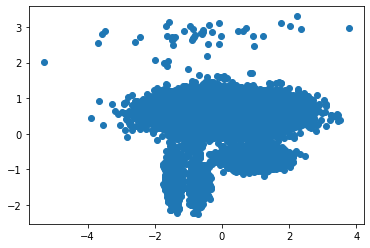

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(zs[:,0], zs[:, 1])

In [74]:
recon_batch[0].cpu().numpy()

array([-0.08207334, -0.04703572, -0.12547836, -0.39051512, -0.3826416 ,
       -0.3655872 , -0.35330725, -0.38444355, -0.3789965 , -0.35912877,
       -0.3301099 , -0.33074707,  0.4112847 , -0.38519308], dtype=float32)

In [75]:
sigma = torch.exp(logvar/2)

In [76]:
mu[1], sigma[1]

(tensor([3.8970e-01, 4.7228e-02, 2.1364e-04]),
 tensor([0.7765, 0.2560, 1.0002]))

In [77]:
mu.mean(axis=0), sigma.mean(axis=0)

(tensor([ 0.0086,  0.0485, -0.0001]), tensor([0.6815, 0.2470, 1.0004]))

In [78]:
# sample z from q
no_samples = 20
q = torch.distributions.Normal(mu.mean(axis=0), sigma.mean(axis=0))
z = q.rsample(sample_shape=torch.Size([no_samples]))
z.shape

torch.Size([20, 3])

In [79]:
with torch.no_grad():
    pred = model.decode(z).cpu().numpy()

In [82]:
scaler = trainloader.dataset.standardizer

In [83]:
fake_data = scaler.inverse_transform(pred)
fake_data.shape

(20, 14)

In [90]:
df_fake = pd.DataFrame(fake_data, columns = df_base.columns)
df_fake['ocr_length'] = np.round(df_fake['ocr_length']).astype(int)
df_fake['ocr_length'] = np.where(df_fake['ocr_length']<1, 1, df_fake['ocr_length'])
df_fake['Number_of_clusters'] = np.round(df_fake['Number_of_clusters']).astype(int)
df_fake['Number_of_clusters'] = np.where(df_fake['Number_of_clusters']<0, 0, df_fake['Number_of_clusters'])
df_fake['median_within_median'] = np.where(df_fake['median_within_median']<0, np.nan, df_fake['median_within_median'])
df_fake['median_between_median'] = np.where(df_fake['median_between_median']<0, np.nan, df_fake['median_between_median'])
df_fake['max_between_max'] = np.where(df_fake['max_between_max']<0, np.nan, df_fake['max_between_max'])
df_fake['max_within_max'] = np.where(df_fake['max_between_max']<0, np.nan, df_fake['max_between_max'])
df_fake['max_within_OCR_number'] = np.round(df_fake['max_within_OCR_number']).astype(int)
df_fake['max_within_OCR_number'] = np.where(df_fake['max_within_OCR_number']<1, np.nan, df_fake['max_within_OCR_number'])
df_fake['zero_number'] = np.round(df_fake['zero_number']).astype(int)
df_fake['zero_number'] = np.where(df_fake['zero_number']<1, np.nan, df_fake['zero_number'])
df_fake['within_median_zero'] = np.where(df_fake['within_median_zero']<0, np.nan, df_fake['within_median_zero'])
df_fake['within_max_zero'] = np.where(df_fake['within_max_zero']<0, np.nan, df_fake['within_max_zero'])
df_fake['max_kde_density'] = np.where(df_fake['max_kde_density']<0, np.nan, df_fake['max_kde_density'])
df_fake['kde_cluster_density_max'] = np.where(df_fake['kde_cluster_density_max']<0, np.nan, df_fake['kde_cluster_density_max'])
df_fake.head(100)

,n.ball.volume,Max_euclidean_dist,ocr_length,Number_of_clusters,median_within_median,median_between_median,max_between_max,max_within_max,max_within_OCR_number,zero_number,within_median_zero,within_max_zero,max_kde_density,kde_cluster_density_max
0,1.182211,0.466673,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.711881,-1.790125,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.853995,NaN
2,-0.091996,0.087951,16,1,25.603544,NaN,NaN,NaN,33.0,25.0,14.276596,16.709249,NaN,25.527119
3,-1.653197,-1.759854,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.293349,NaN
4,-0.553282,-0.641696,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368126,NaN
5,-0.839125,-1.952145,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.687752,-0.681173,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.703625,NaN
7,-0.536650,-0.546347,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.106882,NaN
8,-0.398651,-0.418549,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.776835,NaN
9,0.663160,0.315410,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
